In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
def question_type_processing(question_type):
    question_type = question_type.split(",")[0]
    question_type = question_type.lower()
    question_type = question_type.replace("'", "")
    question_type = question_type.replace(".", "")
    question_type = question_type.replace("`", "")
    question_type = question_type.replace('"', "")
    question_type = question_type.replace("question type: ", "")
    question_type = question_type.replace("question: ", "")
    question_type = question_type.replace("’", "")
    question_type = question_type.replace("[", "")
    question_type = question_type.replace("]", "")
    question_type = question_type.replace("-", "")
    # question_type = question_type.split('(')[0].strip()

    # if "yes/no" in question_type:
    #     return 'yes/no'
    # elif "color" in question_type:
    #     return 'color'
    # elif "object identification" in question_type:
    #     return 'object identification'
    # elif "signage recognition" in question_type:
    #     return 'signage recognition'
    # elif "spatial relations" in question_type:
    #     return 'location and spatial relations'
    # elif "emoition and sentiment" in question_type or 'emotikon and sentiment' in question_type:
    #     return 'emotion and sentiment'
    # elif "compariosn" in question_type or "comparision" in question_type:
    #     return 'comparison'
    # elif "counting" in question_type:
    #     return 'counting'
    # elif "personal  " in question_type:
    #     return 'person identification'

    # if question_type not in ['yes/no', 'color', 'object identification', 'counting', 
    #                          'location and spatial relations', 'person identification',
    #                          'activity recognition', 'comparison', 'sport identification', 
    #                          'emotion and sentiment', 'signage recognition', 'weather', 'shape', 
    #                          'time and sequence', 'animal']:
    #     return 'other'
    return question_type


In [18]:
question_type_dict = {}
with open('/home/ndhuynh/github/Question-Analysis/train_question_type_gpt.json', 'r') as file:
    for line in file:
        question_object = json.loads(line)
        question_str = question_object["question"]
        question_type = question_object["question_type"]
        question_type = question_type_processing(question_type)
        question_type_dict[question_str] = question_type
file.close()

In [19]:
with open('/home/ndhuynh/github/Question-Analysis/val_question_type_gpt.json', 'r') as file:
    for line in file:
        question_object = json.loads(line)
        question_str = question_object["question"]
        if question_str not in question_type_dict:
            question_type = question_object["question_type"]
            question_type = question_type_processing(question_type)
            question_type_dict[question_str] = question_type
file.close()

In [20]:
with open('/home/ndhuynh/data/simpsonsvqa/v1_Question_Train_simpsons_vqa.json', 'r') as file:
    train_questions = json.load(file)["questions"]
train_questions = pd.DataFrame(train_questions)

In [21]:
with open('/home/ndhuynh/data/simpsonsvqa/v1_Question_Train_simpsons_vqa.json', 'r') as file:
    train_questions = json.load(file)["questions"]
train_questions = pd.DataFrame(train_questions)
train_questions["question_type"] = train_questions["question"].apply(lambda x: question_type_dict[x])
train_question_type_summary = train_questions['question_type'].value_counts().reset_index()

In [25]:
train_question_type_summary[:40]

,question_type,count
0,object identification,29800
1,color,28096
2,location and spatial relations,20005
3,counting,13430
4,activity recognition,6318
5,person identification,5787
6,comparison,2673
7,text and signage recognition,2483
8,emotion and sentiment,1316
9,sport identification,1174


In [1]:
28146 + 26602 + 25447 + 13421 + 10049 + 3398 + 3398 + 1853 + 799 + 776 + 487 + 484 + 477 + 224 + 78 + 24

115663

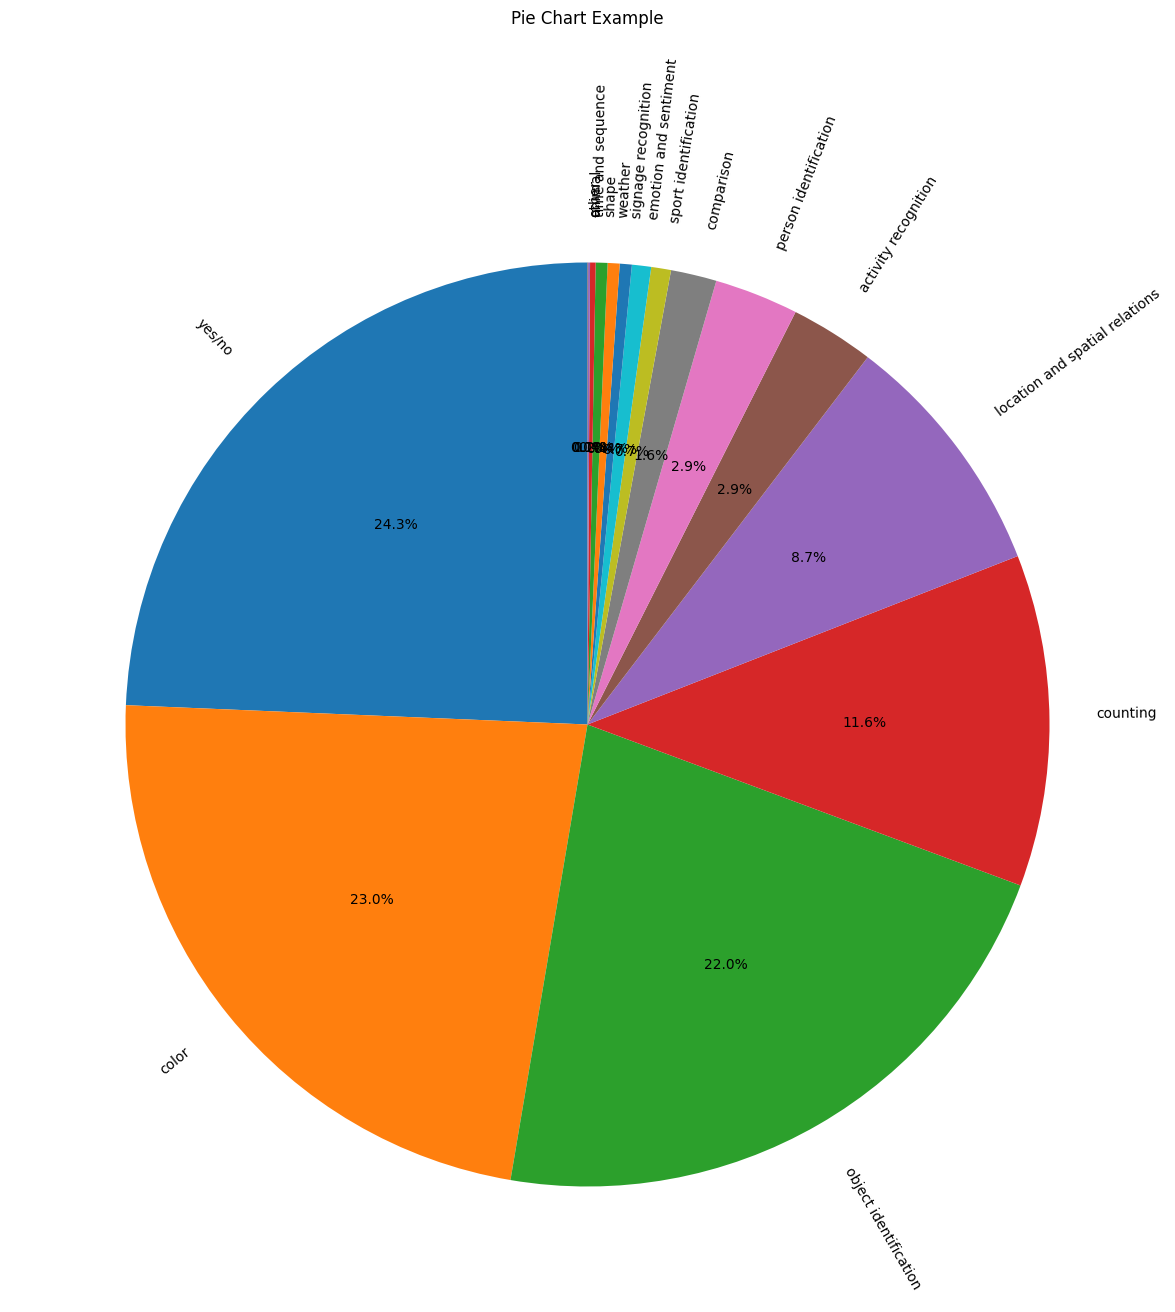

In [113]:
plt.figure(figsize=(15, 15))  # Set the figure size
plt.pie(train_question_type_summary['count'], labels=train_question_type_summary['question_type'], autopct='%1.1f%%', startangle=90, labeldistance=1.1, rotatelabels=True)
plt.title('Pie Chart Example', y=1.1)
plt.show()

In [114]:
with open('/home/ndhuynh/data/simpsonsvqa/v1_Question_Val_simpsons_vqa.json', 'r') as file:
    val_questions = json.load(file)["questions"]
val_questions = pd.DataFrame(val_questions)
val_questions["question_type"] = val_questions["question"].apply(lambda x: question_type_dict[x])
val_questions['question_type'].value_counts()
val_question_type_summary = val_questions['question_type'].value_counts().reset_index()

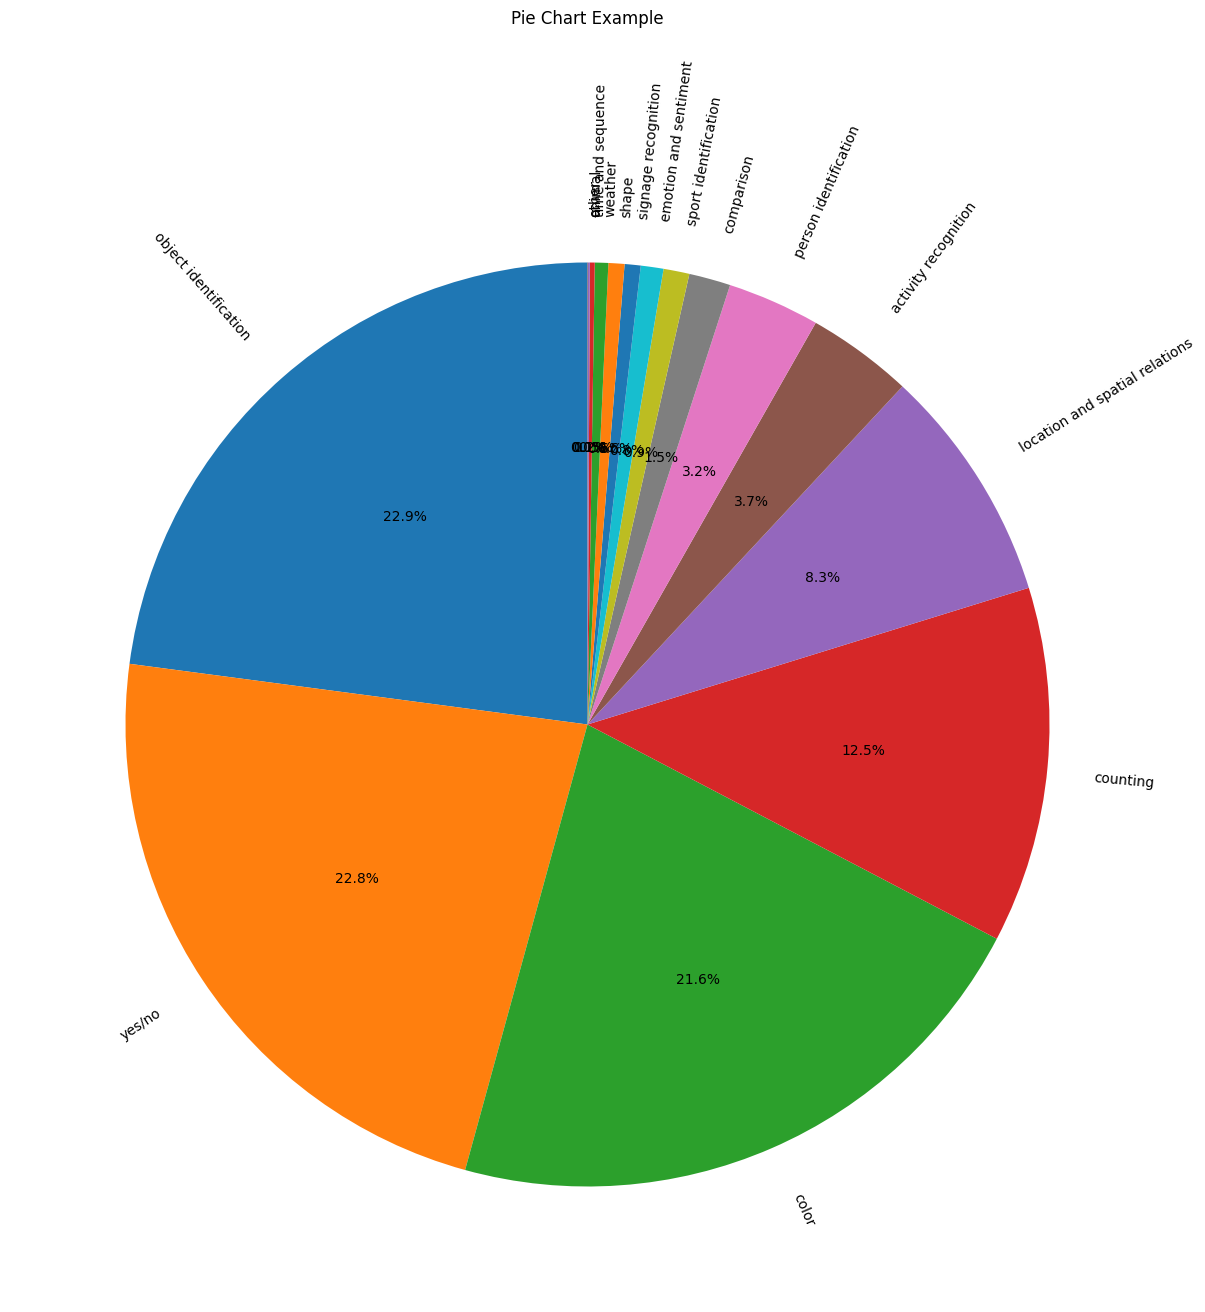

In [115]:
plt.figure(figsize=(15, 15))  # Set the figure size
plt.pie(val_question_type_summary['count'], labels=val_question_type_summary['question_type'], autopct='%1.1f%%', startangle=90, labeldistance=1.1, rotatelabels=True)
plt.title('Pie Chart Example', y=1.1)
plt.show()

In [116]:
id = 0
dic = {}
for value in train_question_type_summary['question_type'].values:
    dic[id] = value
    id += 1

In [91]:
dic

{0: 'yes/no',
 1: 'color',
 2: 'object identification',
 3: 'counting',
 4: 'location and spatial relations',
 5: 'activity recognition',
 6: 'person identification',
 7: 'comparison',
 8: 'sport identification',
 9: 'emotion and sentiment',
 10: 'signage recognition',
 11: 'weather',
 12: 'shape',
 13: 'time and sequence',
 14: 'animal',
 15: 'other'}

In [87]:
train_question_type_summary['question_type'].values

array(['yes/no', 'color', 'object identification', 'counting',
       'location and spatial relations', 'activity recognition',
       'person identification', 'comparison', 'sport identification',
       'emotion and sentiment', 'signage recognition', 'weather', 'shape',
       'time and sequence', 'animal', 'other'], dtype=object)